✅ Accuracy: 0.9
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


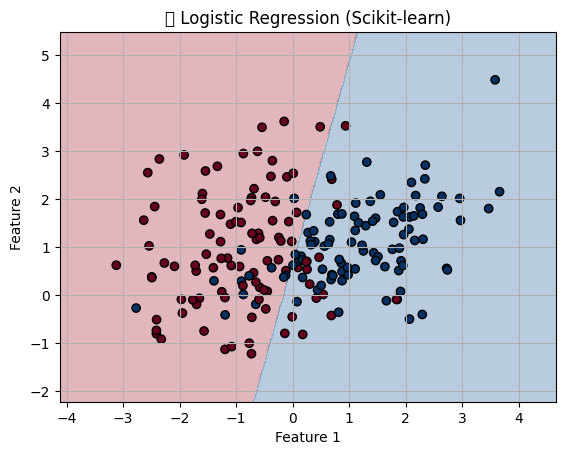

In [1]:
# 📌 Logistic Regression using Scikit-learn
# -----------------------------------------
# This script demonstrates how to build a binary classifier using Logistic Regression from scikit-learn.

from sklearn.datasets import make_classification           # For generating synthetic classification data
from sklearn.model_selection import train_test_split       # To split the dataset into training and test sets
from sklearn.linear_model import LogisticRegression        # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report  # Metrics to evaluate model
import matplotlib.pyplot as plt                            # For plotting
import numpy as np

# 🔹 Step 1: Generate synthetic data
# ----------------------------------
# We'll generate 200 samples with 2 informative features (no redundant features), binary class (0 or 1)

X, y = make_classification(n_samples=200,      # Total 200 samples
                           n_features=2,       # Two input features (for 2D plotting)
                           n_redundant=0,      # No redundant features
                           n_informative=2,    # Both features are useful
                           n_clusters_per_class=1,
                           random_state=42)    # Set seed for reproducibility

# 🔹 Step 2: Split data into training and test sets
# -------------------------------------------------
# We'll use 70% for training and 30% for testing

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

# 🔹 Step 3: Create and train the Logistic Regression model
# ---------------------------------------------------------
# scikit-learn makes this step very simple

model = LogisticRegression()        # Create the model object
model.fit(x_train, y_train)         # Fit the model to training data

# 🔹 Step 4: Predict on the test set
# -----------------------------------
y_pred = model.predict(x_test)      # Use the trained model to predict test labels

# 🔹 Step 5: Evaluate model performance
# --------------------------------------
# We'll check the overall accuracy and print classification report (precision, recall, F1-score)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Step 6: Visualize decision boundary
# ---------------------------------------
# Plot the model’s decision surface (only possible with 2D features like we have here)

# Create a mesh grid covering the data space
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Feature 1 range
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Feature 2 range
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on every point in the mesh to create contour
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a contour plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)  # Decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)  # Data points
plt.title("🔍 Logistic Regression (Scikit-learn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
